In [1]:
import numpy as np
import pandas as pd

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sartajbhuvaji/brain-tumor-classification-mri")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'brain-tumor-classification-mri' dataset.
Path to dataset files: /kaggle/input/brain-tumor-classification-mri


In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(84).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(44).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(245).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/6.jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(238).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(196).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(108).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(310).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image (5).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(186).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(29).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(140).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(224).jpg

In [10]:
!cp -r {path} /content/Dataset

# Now all files of the dataset stored in Dataset Folder

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras.utils import image_dataset_from_directory

In [8]:
train_ds = image_dataset_from_directory(
    directory = '/content/Dataset/Training',
    image_size = (150,150),
    batch_size = 32,
    seed = 42,
    shuffle = True
)

Found 2870 files belonging to 4 classes.


In [9]:
test_ds = image_dataset_from_directory(
    directory = '/content/Dataset/Testing',
    image_size = (150,150),
    batch_size = 32,
    seed = 42,
    shuffle = True
)

Found 394 files belonging to 4 classes.


In [ ]:
for image_batch,label_batch in train_ds.take(1):
  print('Image Shape',image_batch.shape)
  print('Label Batch',label_batch)
  print('Image ',image_batch[0])

Image Shape (32, 256, 256, 3)
Label Batch tf.Tensor([3 0 0 0 0 2 1 2 3 0 1 1 3 3 1 1 3 1 2 0 0 3 3 1 3 0 2 1 2 3 1 1], shape=(32,), dtype=int32)
Image  tf.Tensor(
[[[0.  0.  0. ]
  [0.  0.  0. ]
  [0.  0.  0. ]
  ...
  [0.  0.  0. ]
  [0.  0.  0. ]
  [0.  0.  0. ]]

 [[0.  0.  0. ]
  [0.  0.  0. ]
  [0.  0.  0. ]
  ...
  [0.5 0.5 0.5]
  [0.5 0.5 0.5]
  [0.5 0.5 0.5]]

 [[1.  1.  1. ]
  [1.  1.  1. ]
  [1.  1.  1. ]
  ...
  [2.5 2.5 2.5]
  [2.5 2.5 2.5]
  [2.5 2.5 2.5]]

 ...

 [[1.  1.  1. ]
  [1.  1.  1. ]
  [1.  1.  1. ]
  ...
  [3.5 3.5 3.5]
  [3.5 3.5 3.5]
  [3.5 3.5 3.5]]

 [[0.  0.  0. ]
  [0.  0.  0. ]
  [0.  0.  0. ]
  ...
  [1.5 1.5 1.5]
  [1.5 1.5 1.5]
  [1.5 1.5 1.5]]

 [[0.  0.  0. ]
  [0.  0.  0. ]
  [0.  0.  0. ]
  ...
  [1.  1.  1. ]
  [1.  1.  1. ]
  [1.  1.  1. ]]], shape=(256, 256, 3), dtype=float32)


In [ ]:
class_names = train_ds.class_names
class_names

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [ ]:
import matplotlib.pyplot as plt

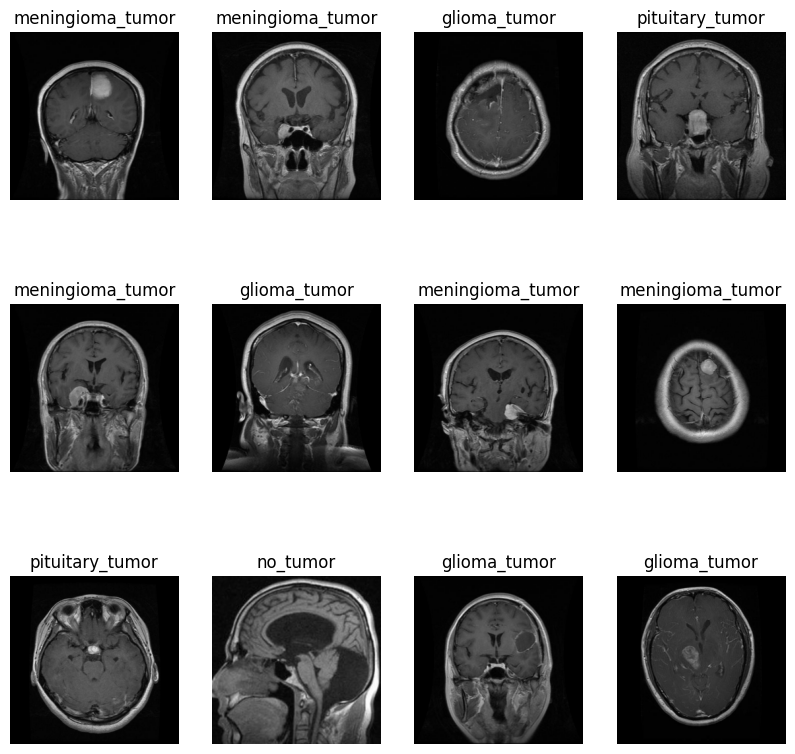

In [ ]:
# Create a blank figure (canvas) to display multiple images
plt.figure(figsize=(10, 10))   # width=10 inches, height=10 inches

# Take only ONE batch from the dataset
# dataset.take(1) → gives 1 batch (not 1 image)
for image_batch, labels_batch in dataset.take(1):

    # image_batch → batch of images
    # shape example: (32, 224, 224, 3)
    # 32 images, each 224x224, 3 color channels

    # labels_batch → batch of labels
    # shape example: (32,)
    # 32 labels corresponding to 32 images

    for i in range(12):  # we want to display first 12 images

        # Create a subplot grid:
        # 3 rows, 4 columns, position = i+1
        ax = plt.subplot(3, 4, i + 1)

        # image_batch[i] → selects one image from batch
        # .numpy() → converts TensorFlow tensor → NumPy array
        # .astype("uint8") → converts to image-friendly format (0–255 integers)
        plt.imshow(image_batch[i].numpy().astype("uint8"))

        # labels_batch[i] → numeric label (0 or 1)
        # class_names[...] → converts number → actual class name
        plt.title(class_names[labels_batch[i]])

        # Remove axis numbers (clean display)
        plt.axis("off")

In [ ]:
len(train_ds)

90

In [ ]:
len(test_ds)

13

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Input,
    Rescaling,
    Resizing,
    RandomFlip,
    RandomRotation,
    RandomZoom,
    Conv2D,
    MaxPooling2D,
    Flatten,
    Dense,
    Dropout
)

In [ ]:
data_augmentation = tf.keras.Sequential([
  RandomFlip("horizontal_and_vertical"),
  RandomRotation(0.2),
])


In [ ]:
#Applying Data Augmentation to Train Dataset
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_70 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_71 (Conv2D)              │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_72 (Conv2D)              │ (None, 71, 71, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_73 (Conv2D)              │ (None, 69, 69, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_74 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_75 (Conv2D)              │ (None, 30, 30, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_76 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_77 (Conv2D)              │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_78 (Conv2D)              │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_43 (MaxPooling2D) │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,447,044 (16.96 MB)

 Trainable params: 4,447,044 (16.96 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=20,validation_data=test_ds)

Epoch 1/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 18s 126ms/step - accuracy: 0.3675 - loss: 2.0236 - val_accuracy: 0.3528 - val_loss: 2.0225
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - accuracy: 0.6120 - loss: 0.9015 - val_accuracy: 0.4112 - val_loss: 1.6610
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - accuracy: 0.7101 - loss: 0.6879 - val_accuracy: 0.4467 - val_loss: 2.4244
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - accuracy: 0.7856 - loss: 0.5188 - val_accuracy: 0.6041 - val_loss: 1.8709
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 8s 88ms/step - accuracy: 0.8535 - loss: 0.3702 - val_accuracy: 0.6015 - val_loss: 2.2621
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - accuracy: 0.8917 - loss: 0.3046 - val_accuracy: 0.6980 - val_loss: 1.7562
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 11s 85ms/step - accuracy: 0.9099 - loss: 0.2373 - val_accuracy: 0.6701 - val_loss: 2.8858
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - accuracy: 0.9304 - loss: 0.1943 - val_accuracy: 0.7310 

In [ ]:
loss,acc = model.evaluate(test_ds)
print("Test Acc",acc)
loss,acc = model.evaluate(train_ds)
print("Train Acc",acc)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7225 - loss: 7.0673
Test Acc 0.7411167621612549
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.9969 - loss: 0.0112
Train Acc 0.9958187937736511


/tmp/ipython-input-974610335.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


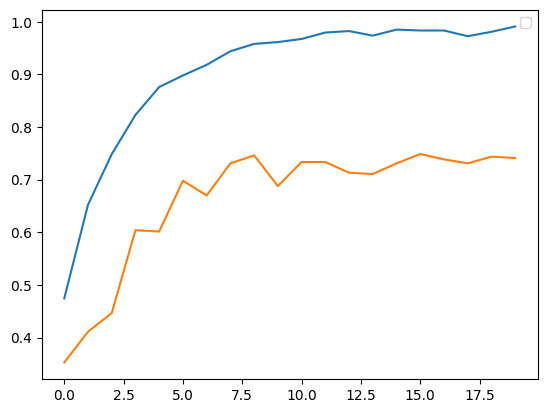

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend()
plt.show()

/tmp/ipython-input-848098724.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


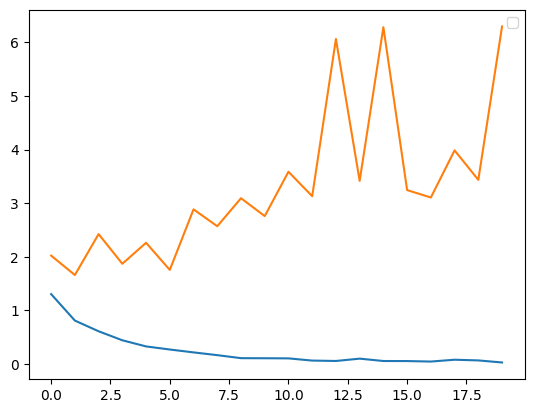

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend()
plt.show()

In [ ]:
model.save("brain_model.h5")

#Prediction

In [ ]:
model = tf.keras.models.load_model('brain_model.h5')

Fisrt image to predict
Actual label: meningioma_tumor
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Predicted label: meningioma_tumor


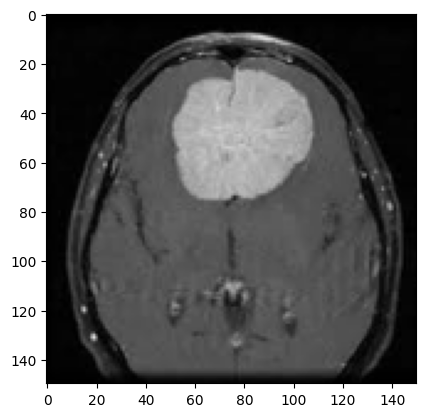

In [ ]:
for image,label in test_ds.take(1):

  first_image = image[0].numpy().astype('uint8')
  first_label = label[0].numpy()

  print("Fisrt image to predict")
  plt.imshow(first_image)
  print("Actual label:",class_names[first_label])

  prediction = model.predict(image)
  print("Predicted label:",class_names[np.argmax(prediction[0])])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


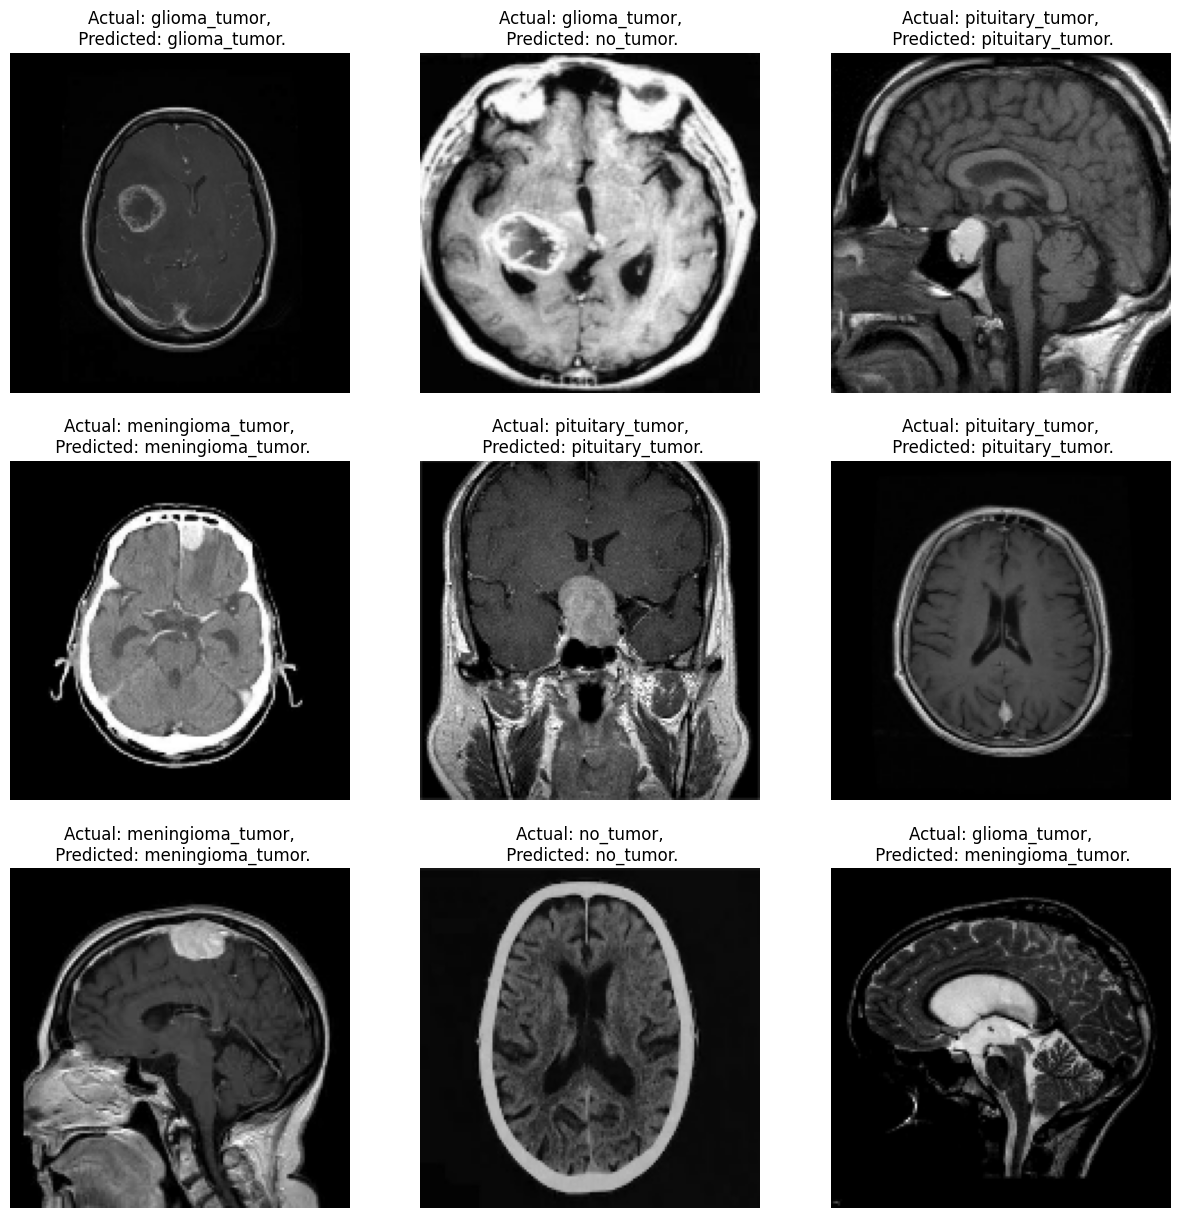

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        actual_class = class_names[labels[i]]
        prediction = model.predict(images)
        predicted_class = class_names[np.argmax(prediction[i])]


        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.")

        plt.axis("off")